In [1]:
# Program to find measure of expected significance as a function
# of a cut value x_cut applied to measured variable x
# by Monte Carlo simulation of the likelihood ratio statistic.
# G. Cowan / RHUL Physics / December 2022

import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

In [2]:
#  Define pdfs and likelihood-ratio statisic
s_tot = 10.
b_tot = 100.
ps = s_tot/(s_tot+b_tot)
def f_s(x):
    return 3.*(1.-x)**2
def f_b(x):
    return 3.*x**2
def q(x):
    return -2.*np.log(1. + (s_tot/b_tot)*f_s(x)/f_b(x))

In [3]:
# Generate data under b and s+b hypotheses
qb = []
qsb = []
numExp = 1000000
np.random.seed(seed=1234567)        # fix random seed
for i in range(numExp):
    n = np.random.poisson(b_tot)       # first b only
    r = np.random.uniform(0., 1., n)
    xb = r**(1./3.)
    qb.append(np.sum(q(xb)))
    n = np.random.poisson(s_tot+b_tot) # then s+b
    r1 = np.random.uniform(0., 1., n)
    r2 = np.random.uniform(0., 1., n)
    xsb = [1. - r1[j]**(1./3.) if r2[j]<ps else r1[j]**(1./3.) for j in range(n)]
    xsb = np.array(xsb)
    qsb.append(np.sum(q(xsb)))
    if len(qsb)%(numExp/100) == 0:
            print(".", end="", flush=True)
print("\n")
qb = np.array(qb)
qsb = np.array(qsb)

....................................................................................................



In [4]:
# Make and analyse histograms of q for b and s+b hypotheses
nBins = 400
qMin = -200.
qMax = 0.
qbHist, bin_edges = np.histogram(qb, bins=nBins, range=(qMin,qMax), density=True)
qsbHist, bin_edges = np.histogram(qsb, bins=nBins, range=(qMin,qMax), density=True)
med_q_sb = np.median(qsb)
print("median[q|s+b]   = {:.3f}".format(med_q_sb))

median[q|s+b]   = -42.664


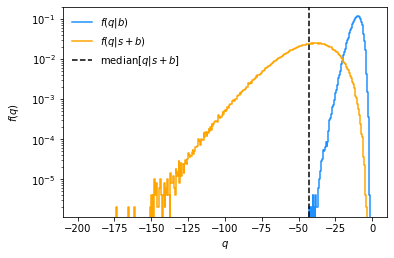

In [5]:
# Plot histograms of q
binLo, binHi = bin_edges[:-1], bin_edges[1:]
xPlot = np.array([binLo, binHi]).T.flatten()
ybPlot = np.array([qbHist, qbHist]).T.flatten()
ysbPlot = np.array([qsbHist, qsbHist]).T.flatten()
fig, ax = plt.subplots(1,1)
plt.yscale("log")
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.xlabel(r'$q$', labelpad=5)
plt.ylabel(r'$f(q)$', labelpad=10)
plt.plot(xPlot, ybPlot, label=r'$f(q|b)$', color='dodgerblue')
plt.plot(xPlot, ysbPlot, label=r'$f(q|s+b)$', color='orange')
ax.axvline(med_q_sb, color="black", linestyle="dashed", label = r'median$[q|s+b]$')
ax.legend(loc='upper left', frameon=False)
plt.show()

In [6]:
# Add code to calculate the p-value of the b-only hypothesis
# for the median q from data generated according to s+b.
# Find the corresponding significance Z.